In [105]:

# Specify directories 
data_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/raw_data"
output_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/output"

In [106]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [107]:
# Yash Singh 
# date: 11/1/2024 
# this script uses data from the Atlanta Fed Wage Tracker to construct real wage indices across the income distribution 

# Specify directories 
data_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/raw_data"
output_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/output"

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_excel(f"{data_dir}/atl_fed/wage-growth-data.xlsx", sheet_name = 'Average Wage Quartile', skiprows=2, header=0)
cpi = pd.read_csv(f"{data_dir}/CPI/CPIAUCSL.csv")

# Set global styles
plt.rcParams.update({
    'font.size': 14,             # Set default font size
    'axes.titlesize': 24,        # Title font size
    'axes.labelsize': 20,        # Axis labels font size
    'legend.fontsize': 12,       # Legend font size
    'xtick.labelsize': 20,       # X-axis tick labels
    'ytick.labelsize': 20,       # Y-axis tick labels
    'legend.frameon': False,     # Remove legend box
    'axes.spines.top': False,    # Remove top spine
    'axes.spines.right': False,  # Remove right spine
})

# Atlanta Fed Wage Data 
data = data.rename(columns={
    'Unnamed: 0': 'date',
    'Lowest quartile of wage distribution': 'Q1',
     '2nd quartile of wage distribution': 'Q2', 
    '3rd quartile of wage distribution': 'Q3', 
    'Highest quartile of wage distribution': 'Q4'
})

select = ['date', 'Q1', 'Q2', 'Q3', 'Q4']
df = data[select]


# CPI-U 
cpi = cpi.iloc[10:].reset_index(drop=True)

cpi = cpi.rename(columns={
                            'observation_date': 'date', 
                            'CPIAUCSL':               'P'
})

cpi['date'] = pd.to_datetime(cpi['date'])
cpi['P'] = pd.to_numeric(cpi['P'], errors='coerce')
cpi['P_12m_change'] = cpi['P'].pct_change(periods=12) * 100



wage_data = data.merge(cpi, on='date', how = 'left')

wage_data_copy = wage_data.copy()

wage_data = wage_data[wage_data['date'] >= '2015-12-01']
wage_data = wage_data[wage_data['date'] <= '2024-12-01']


wage_data = wage_data.drop(['Lowest half of wage distribution', 'Upper half of wage distribution'], axis = 1)
wage_data = wage_data.reset_index(drop=True)

#wage_data['P_norm'] = wage_data['P'] / wage_data['P'].iloc[0]
#wage_data['price_mom_grth'] = 1 + wage_data['P_norm'].pct_change()

wage_data = wage_data[wage_data['date'] >= '2016-01-01']

wage_data['q1_mom_grth'] = 1+ (wage_data['Q1']/100)/12
wage_data['q2_mom_grth'] = 1+ (wage_data['Q2']/100)/12
wage_data['q3_mom_grth'] = 1+ (wage_data['Q3']/100)/12
wage_data['q4_mom_grth'] = 1+ (wage_data['Q4']/100)/12
wage_data['med_mom_grth'] = 1+ (wage_data['Overall']/100)/12

wage_data['P_1m_change'] = 1 + (wage_data['P_12m_change']/100)/12

wage_data['nom_wage_index_1'] = wage_data['q1_mom_grth'].cumprod()
wage_data['nom_wage_index_2'] = wage_data['q2_mom_grth'].cumprod()
wage_data['nom_wage_index_3'] = wage_data['q3_mom_grth'].cumprod()
wage_data['nom_wage_index_4'] = wage_data['q4_mom_grth'].cumprod()
wage_data['med_nom_wage_index'] = wage_data['med_mom_grth'].cumprod()
wage_data['price_index']      = wage_data['P_1m_change'].cumprod()
#wage_data['cpi']              = wage_data['price_mom_grth'].cumprod()

In [108]:
keep = ['date', 'Overall', 'med_nom_wage_index', 'P', "price_index"]
wage_data = wage_data[keep]

In [109]:
wage_data['med_real_wage_index'] = wage_data['med_nom_wage_index'] / wage_data['price_index']

In [110]:
wage_data

,date,Overall,med_nom_wage_index,P,price_index,med_real_wage_index
1,2016-01-01,3.1,1.002583,237.652,1.001031,1.00155
2,2016-02-01,3.2,1.005257,237.336,1.001738,1.003513
3,2016-03-01,3.1,1.007854,238.080,1.002482,1.005358
4,2016-04-01,3.1,1.010457,238.992,1.003462,1.006971
5,2016-05-01,3.2,1.013152,239.557,1.004364,1.00875
...,...,...,...,...,...,...
104,2024-08-01,5,1.426448,314.121,1.319728,1.080865
105,2024-09-01,5,1.432392,314.686,1.322375,1.083196
106,2024-10-01,4.9,1.438241,315.454,1.325215,1.085289
107,2024-11-01,4.8,1.443994,316.441,1.328232,1.087154


In [111]:
# Atlanta Fed Wage Data 
wage_data = wage_data.rename(columns={
    'med_nom_wage_index': 'nom_wage_index',
    'med_real_wage_index': 'real_wage_index',
})

In [112]:
wage_data.to_excel(f"{output_dir}/data/wage_data_for_mark.xlsx", index=False)

In [113]:
wage_data

,date,Overall,nom_wage_index,P,price_index,real_wage_index
1,2016-01-01,3.1,1.002583,237.652,1.001031,1.00155
2,2016-02-01,3.2,1.005257,237.336,1.001738,1.003513
3,2016-03-01,3.1,1.007854,238.080,1.002482,1.005358
4,2016-04-01,3.1,1.010457,238.992,1.003462,1.006971
5,2016-05-01,3.2,1.013152,239.557,1.004364,1.00875
...,...,...,...,...,...,...
104,2024-08-01,5,1.426448,314.121,1.319728,1.080865
105,2024-09-01,5,1.432392,314.686,1.322375,1.083196
106,2024-10-01,4.9,1.438241,315.454,1.325215,1.085289
107,2024-11-01,4.8,1.443994,316.441,1.328232,1.087154


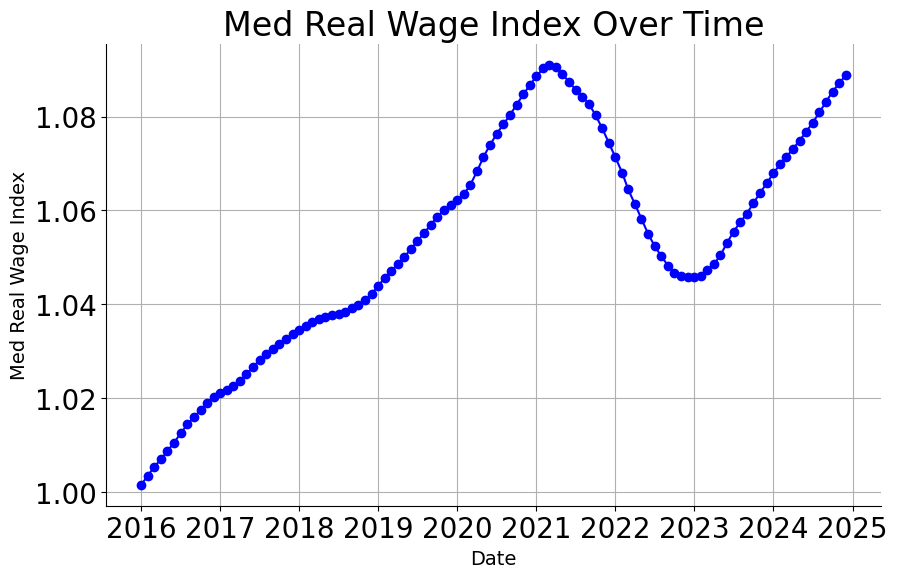

In [49]:

df['date'] = pd.to_datetime(df['date'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['med_real_wage_index'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Med Real Wage Index Over Time')
plt.xlabel('Date')
plt.ylabel('Med Real Wage Index')

# Display the plot
plt.grid(True)
plt.show()